# 서울시 체육시설과 소득 간 비교 분석
서울데이터허브(전국 체육시설 현황·표준데이터)를 기반으로, 서울특별시 자치구별 시설 유형 분포를 시각화하고 구별 소득과의 관계를 간단히 살펴봅니다.

In [4]:
!pip install pandas matplotlib seaborn openpyxl

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

pd.options.display.max_columns = None
sns.set_theme(style='whitegrid')

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [6]:
facility_csv = 'data/전국체육시설 현황(표준데이터).csv'
facility_df = pd.read_csv(facility_csv, encoding='cp949', low_memory=False)
facility_df = facility_df.rename(columns=str.strip)
facility_df.head(3)

,이용단체명,시설생성기준일자,등록신고일자,준공일자,휴업일자,폐업일자,국가체육시설여부,시설명,시설구분명,순번,시설주소,시설상세주소,시설코드,업종명,시설유형명,시설상태명,시설도로명우편번호,시설도로명주소,시설도로명상세주소,우편번호,경도,위도,시설전화번호,자율점검대상여부,등록일시,수정일시,내진설계여부,시설홈페이지,시도,시군구,도로명시도명,도로명시군구명,도로명읍면동명,도로명리명,시설운영형태코드,소유주체명,소유주체시도명,소유주체시군구명,담당자부서명,담당자전화번호,실내야외구분,관람좌석수,관람수용인원수,시설총면적,생활오픈여부,생활체육시설명
0,NaN,20210310,NaN,NaN,NaN,20250620.0,N,위드미 댄스,신고,1,경기도 고양시 덕양구 화정동 968 비젼타워21,1005호,E1DE682A80811DA7E71A53B2F1D45637,무도학원업,무도학원,폐업,10497,경기도 고양시 덕양구 화중로 100(화정동),NaN,10497.0,126.831467,37.636138,NaN,N,2021-08-11,2025-06-21,NaN,NaN,경기도,고양시,경기도,고양시 덕양구,화정동,NaN,자체운영,NaN,경기도,고양시,NaN,NaN,없음,NaN,NaN,88.0,NaN,NaN
1,NaN,20210309,NaN,NaN,NaN,NaN,N,히키스 캐롬 클럽,신고,2,경기도 고양시 덕양구 신원동 633,NaN,97E7959ABA7ED5F870AF36079FC6E98F,당구장업,당구장,정상운영,10571,경기도 고양시 덕양구 신원로 10(신원동),NaN,10571.0,126.890319,37.661865,NaN,Y,2021-08-11,2024-10-31,NaN,NaN,경기도,고양시,경기도,고양시,신원동,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없음,NaN,NaN,248.0,NaN,NaN
2,NaN,20200929,NaN,NaN,NaN,20240621.0,N,빅이닝 고양 볼파크,신고,3,경기도 고양시 덕양구 오금동 379-1,NaN,0CC77977D1C368EB9B82BB3B85F2F7B7,야구장업,야구장,폐업,10574,경기도 고양시 덕양구 통일로396번길 78-25(오금동),(오금동),10574.0,0.000000,0.000000,NaN,N,2021-08-11,2024-10-31,NaN,NaN,경기도,고양시,경기도,고양시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없음,NaN,NaN,10308.0,NaN,NaN


In [7]:
facility_excel = 'data/전국체육시설 현황(표준데이터).xlsx'
import importlib, subprocess, sys
if importlib.util.find_spec('openpyxl') is None:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'openpyxl'])
pd.read_excel(facility_excel, engine='openpyxl', nrows=3)

/opt/homebrew/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,이용단체명,시설생성기준일자,등록신고일자,준공일자,휴업일자,폐업일자,국가체육시설여부,시설명,시설구분명,순번,시설주소,시설상세주소,Unnamed: 12,업종명,시설유형명,시설상태명,시설도로명우편번호,시설도로명주소,시설도로명상세주소,Unnamed: 19,Unnamed: 20,Unnamed: 21,시설전화번호,자율점검대상여부,등록일시,수정일시,내진설계여부,시설홈페이지,Unnamed: 28,Unnamed: 29,도로명시도명,도로명시군구명,Unnamed: 32,도로명리명,시설운영형태코드,소유주체명,소유주체시도명,소유주체시군구명,담당자부서명,담당자전화번호,Unnamed: 40,Unnamed: 41,Unnamed: 42,시설총면적,생활오픈여부
0,NaN,20210310,NaN,NaN,NaN,20250620.0,N,위드미 댄스,신고,1,경기도 고양시 덕양구 화정동 968 비젼타워21,1005호,NaN,무도학원업,무도학원,폐업,10497,경기도 고양시 덕양구 화중로 100(화정동),NaN,NaN,NaN,NaN,NaN,N,2021-08-11,2025-06-21,NaN,NaN,NaN,NaN,경기도,고양시 덕양구,NaN,NaN,자체운영,NaN,경기도,고양시,NaN,NaN,NaN,NaN,NaN,88.0,NaN
1,NaN,20210309,NaN,NaN,NaN,NaN,N,히키스 캐롬 클럽,신고,2,경기도 고양시 덕양구 신원동 633,NaN,NaN,당구장업,당구장,정상운영,10571,경기도 고양시 덕양구 신원로 10(신원동),NaN,NaN,NaN,NaN,NaN,Y,2021-08-11,2024-10-31,NaN,NaN,NaN,NaN,경기도,고양시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN
2,NaN,20200929,NaN,NaN,NaN,20240621.0,N,빅이닝 고양 볼파크,신고,3,경기도 고양시 덕양구 오금동 379-1,NaN,NaN,야구장업,야구장,폐업,10574,경기도 고양시 덕양구 통일로396번길 78-25(오금동),(오금동),NaN,NaN,NaN,NaN,N,2021-08-11,2024-10-31,NaN,NaN,NaN,NaN,경기도,고양시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10308.0,NaN


### 서울시 자치구 필터링
서울특별시에 있는 시설만 남기고 자치구와 시설 유형 중심으로 분석합니다.

In [8]:
seoul_df = facility_df[facility_df['시도'] == '서울특별시'].copy()
seoul_df['시군구'] = seoul_df['시군구'].str.strip()
seoul_df[['시설명', '시설유형명', '시군구']].head(3)


,시설명,시설유형명,시군구
13,더블원골프 잠실점,골프,송파구
15,수도관멀티짐,우슈,중랑구
16,나비캐롬 망우점,당구장,중랑구


In [ ]:
tax_path = 'data/지방세징수(구별)_20251202141719.xlsx'
tax_df = pd.read_excel(tax_path, engine='openpyxl', skiprows=3)
tax_df = tax_df.rename(columns={'구별(1)': '시군구'})
tax_df['시군구'] = tax_df['시군구'].astype(str).str.strip()
tax_df = tax_df[tax_df['시군구'].str.endswith('구')].copy()
tax_df['세수총액_2024'] = pd.to_numeric(tax_df['2024'], errors='coerce').fillna(0)
tax_df = tax_df[['시군구', '세수총액_2024']]
tax_df

In [9]:
district_type_counts = (
    seoul_df.groupby(['시군구', '시설유형명'])
    .size()
    .reset_index(name='count')
)
district_totals = (
    district_type_counts
    .groupby('시군구', as_index=False)['count']
    .sum()
    .rename(columns={'count': 'facility_count'})
)
district_totals.sort_values('facility_count', ascending=False).head(5)


,시군구,facility_count
0,강남구,2245
17,송파구,1420
3,강서구,1372
14,서초구,1348
19,영등포구,1325


<Figure size 1600x800 with 0 Axes>

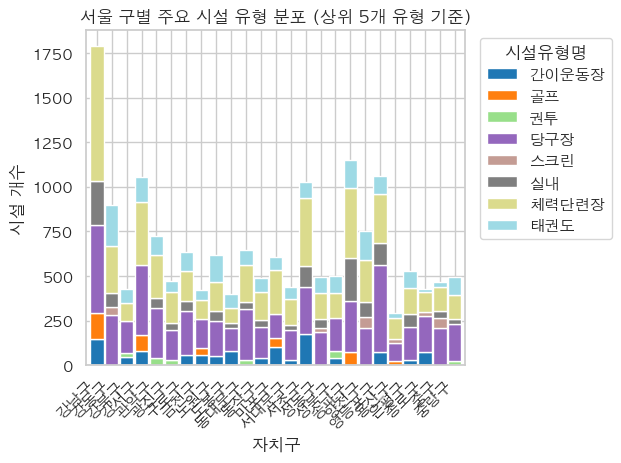

In [10]:
top_types = (
    district_type_counts.sort_values(['시군구', 'count'], ascending=[True, False])
    .groupby('시군구')
    .head(5)
)
stacked = (
    top_types
    .pivot(index='시군구', columns='시설유형명', values='count')
    .fillna(0)
)
stacked = stacked.reindex(sorted(stacked.index))
plt.figure(figsize=(16, 8))
stacked.plot(kind='bar', stacked=True, colormap='tab20', width=0.9)
plt.title('서울 구별 주요 시설 유형 분포 (상위 5개 유형 기준)')
plt.xlabel('자치구')
plt.ylabel('시설 개수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='시설유형명', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
income_values = [
    ('종로구', 4420), ('중구', 4300), ('용산구', 5200), ('성동구', 4700), ('광진구', 4300),
    ('동대문구', 4100), ('중랑구', 4000), ('성북구', 4200), ('강북구', 3900), ('도봉구', 3800),
    ('노원구', 4000), ('은평구', 4100), ('서대문구', 4500), ('마포구', 4700), ('양천구', 4400),
    ('강서구', 4200), ('구로구', 4100), ('금천구', 3900), ('영등포구', 4200), ('동작구', 4300),
    ('관악구', 4000), ('강남구', 5500), ('서초구', 5400), ('송파구', 5200), ('강동구', 4600)
]
income_df = pd.DataFrame(income_values, columns=['시군구', '연간_소득_만원']).sort_values('시군구').reset_index(drop=True)
income_df

,시군구,연간_소득_만원
0,강남구,5500
1,강동구,4600
2,강북구,3900
3,강서구,4200
4,관악구,4000
5,광진구,4300
6,구로구,4100
7,금천구,3900
8,노원구,4000
9,도봉구,3800


In [12]:
district_insights = district_totals.merge(income_df, how='left', on='시군구')
district_insights = district_insights.merge(tax_df, how='left', on='시군구')
district_insights['세수총액_2024'] = district_insights['세수총액_2024'].fillna(0)
district_insights['시설당_소득비율'] = district_insights['facility_count'] / district_insights['연간_소득_만원']
district_insights['시설당_세수비율'] = district_insights['facility_count'] / district_insights['세수총액_2024'].replace(0, np.nan)
district_insights.sort_values('시설당_소득비율', ascending=False)

,시군구,facility_count,연간_소득_만원,시설당_소득비율
0,강남구,2245,5500,0.408182
3,강서구,1372,4200,0.326667
19,영등포구,1325,4200,0.315476
17,송파구,1420,5200,0.273077
14,서초구,1348,5400,0.249630
1,강동구,1114,4600,0.242174
4,관악구,864,4000,0.216000
18,양천구,935,4400,0.212500
8,노원구,833,4000,0.208250
6,구로구,805,4100,0.196341


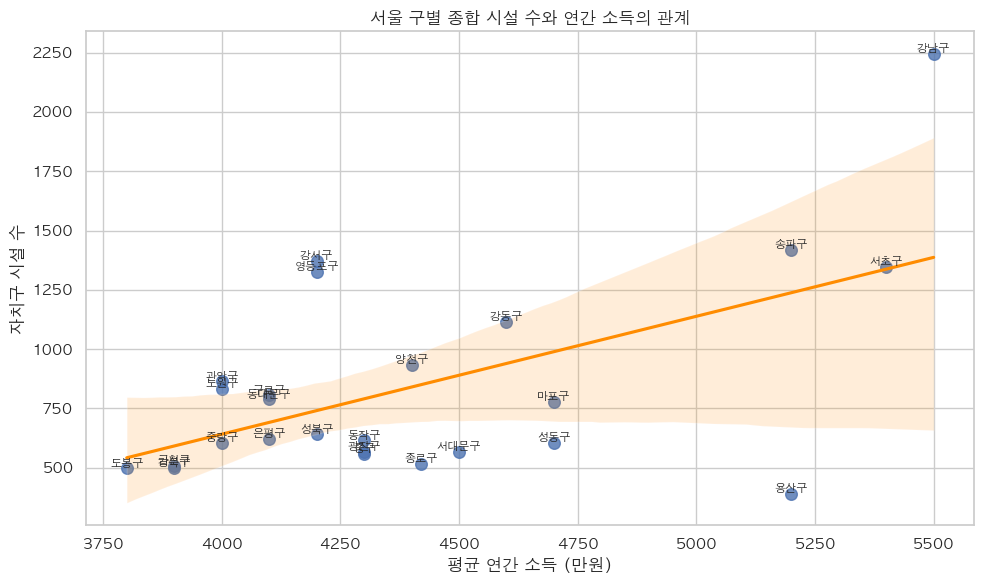

In [13]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=district_insights,
    x='연간_소득_만원',
    y='facility_count',
    scatter_kws={'s': 70, 'alpha': 0.8},
    line_kws={'color': 'darkorange'}
)
for _, row in district_insights.iterrows():
    plt.text(row['연간_소득_만원'], row['facility_count'] + 8, row['시군구'], fontsize=8, ha='center')
plt.title('서울 구별 종합 시설 수와 연간 소득의 관계')
plt.xlabel('평균 연간 소득 (만원)')
plt.ylabel('자치구 시설 수')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(11, 6))
sns.scatterplot(
    data=district_insights,
    x='세수총액_2024',
    y='facility_count',
    color='teal',
    s=80
)
for _, row in district_insights.iterrows():
    plt.text(row['세수총액_2024'], row['facility_count'] + 5, row['시군구'], fontsize=7, ha='center')
plt.title('서울 자치구별 지방세징수 총액과 시설 수')
plt.xlabel('2024 지방세징수 총액 (단위: 천 원)')
plt.ylabel('자치구 시설 수')
plt.tight_layout()
plt.ticklabel_format(style='plain', axis='x')
plt.axvline(district_insights['세수총액_2024'].mean(), color='gray', linestyle='--', linewidth=1)
plt.show()

/var/folders/sd/84ksnxwj58j1vx31b51v1z6c0000gn/T/ipykernel_53338/3903781927.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(sorted_insights['시군구'], rotation=45, ha='right')


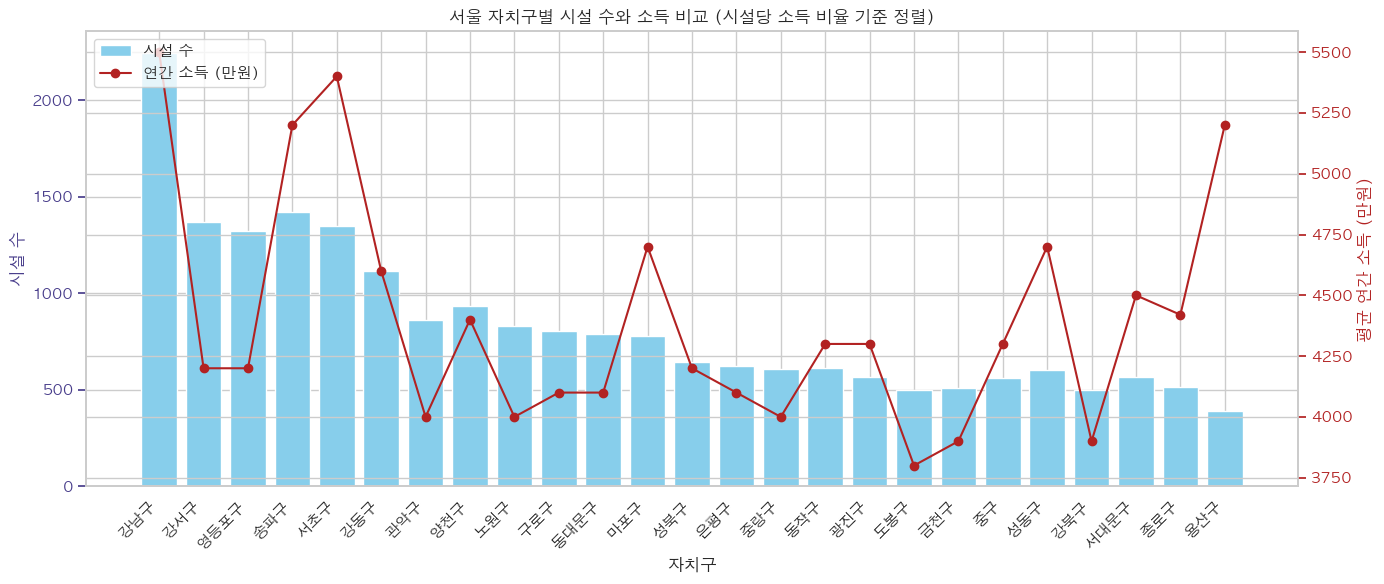

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

facility_csv = 'data/전국체육시설 현황(표준데이터).csv'
facility_df = pd.read_csv(facility_csv, encoding='cp949', low_memory=False)
facility_df = facility_df.rename(columns=str.strip)
seoul_df = facility_df[facility_df['시도'] == '서울특별시'].copy()
seoul_df['시군구'] = seoul_df['시군구'].str.strip()
district_type_counts = (
    seoul_df.groupby(['시군구', '시설유형명']).size().reset_index(name='count')
)
district_totals = (
    district_type_counts.groupby('시군구', as_index=False)['count']
    .sum()
    .rename(columns={'count': 'facility_count'})
)
income_values = [
    ('종로구', 4420), ('중구', 4300), ('용산구', 5200), ('성동구', 4700), ('광진구', 4300),
    ('동대문구', 4100), ('중랑구', 4000), ('성북구', 4200), ('강북구', 3900), ('도봉구', 3800),
    ('노원구', 4000), ('은평구', 4100), ('서대문구', 4500), ('마포구', 4700), ('양천구', 4400),
    ('강서구', 4200), ('구로구', 4100), ('금천구', 3900), ('영등포구', 4200), ('동작구', 4300),
    ('관악구', 4000), ('강남구', 5500), ('서초구', 5400), ('송파구', 5200), ('강동구', 4600)
]
income_df = pd.DataFrame(income_values, columns=['시군구', '연간_소득_만원']).sort_values('시군구').reset_index(drop=True)
tax_path = 'data/지방세징수(구별)_20251202141719.xlsx'
tax_df = pd.read_excel(tax_path, engine='openpyxl', skiprows=3)
tax_df = tax_df.rename(columns={'구별(1)': '시군구'})
tax_df['시군구'] = tax_df['시군구'].astype(str).str.strip()
tax_df = tax_df[tax_df['시군구'].str.endswith('구')].copy()
tax_df['세수총액_2024'] = pd.to_numeric(tax_df['2024'], errors='coerce').fillna(0)
tax_df = tax_df[['시군구', '세수총액_2024']]
district_insights = district_totals.merge(income_df, how='left', on='시군구')
district_insights = district_insights.merge(tax_df, how='left', on='시군구')
district_insights['세수총액_2024'] = district_insights['세수총액_2024'].fillna(0)
district_insights['시설당_소득비율'] = district_insights['facility_count'] / district_insights['연간_소득_만원']
sorted_insights = district_insights.sort_values('시설당_소득비율', ascending=False)
fig, ax1 = plt.subplots(figsize=(14, 6))
bar = ax1.bar(sorted_insights['시군구'], sorted_insights['facility_count'], color='skyblue', label='시설 수')
ax1.set_xlabel('자치구')
ax1.set_ylabel('시설 수', color='darkslateblue')
ax1.tick_params(axis='y', colors='darkslateblue')
ax1.set_xticklabels(sorted_insights['시군구'], rotation=45, ha='right')
ax2 = ax1.twinx()
line = ax2.plot(sorted_insights['시군구'], sorted_insights['연간_소득_만원'], color='firebrick', marker='o', label='연간 소득 (만원)')
ax2.set_ylabel('평균 연간 소득 (만원)', color='firebrick')
ax2.tick_params(axis='y', colors='firebrick')
ax1.set_title('서울 자치구별 시설 수와 소득 비교 (시설당 소득 비율 기준 정렬)')
fig.tight_layout()
plt.legend(handles=[bar, line[0]], loc='upper left')
plt.show()

### 정책 과제 및 제안
1. 소득 대비 시설 수가 낮은 자치구(예: 도봉구, 강북구)에 지역체육센터나 생활체육 프로그램을 집중 배치해 접근성을 높입니다.2. 고소득 자치구에는 공공 시설을 거점으로 하는 주민 참여형 프로그램을 운영하고, 정기 점검을 통해 시설 균형 유지 여부를 확인합니다.3. 구별 시설·소득 지표를 분기 단위로 업데이트하여 `시설당_소득비율`이 과하게 떨어지는 지역을 빠르게 발견하고 예산을 탄력적으로 조정합니다.